# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Dados

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Dividindo os dados em X e y
X = df.drop('outcome', axis=1)
y = df['outcome']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Modelo

In [4]:
# Instanciando o modelo
modelo = RandomForestClassifier(n_estimators=5,
                                max_features=None,
                                max_depth=5,
                                min_samples_split=2, 
                                random_state=0)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=5,
                       random_state=0)

In [5]:
# Predição 
y_pred = modelo.predict(X_test)

# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
print('Acurácia: ', acuracia)

Acurácia:  0.7447916666666666


# Visualização dos resultados

Vamos exportar as três primeiras árvores:

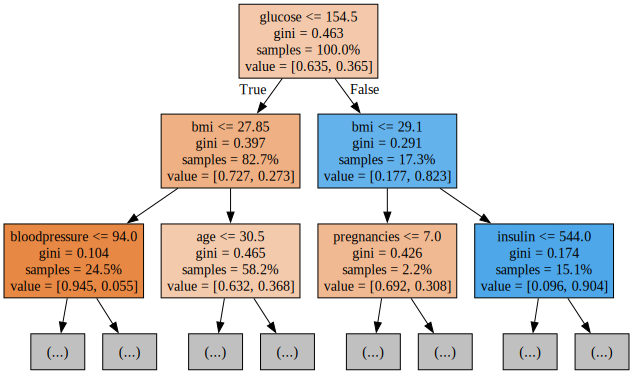

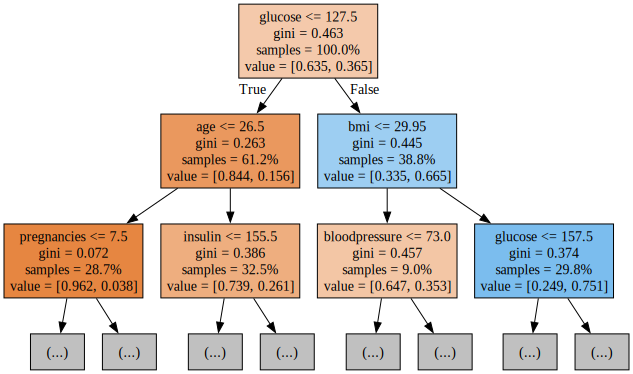

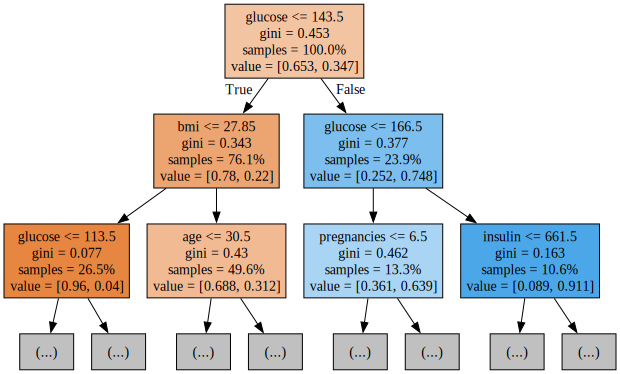

In [6]:
for i in range(3):
    tree = modelo.estimators_[i]
    dot_data = export_graphviz(tree, 
                              feature_names=X_train.columns,
                              filled=True,
                              max_depth=2, 
                              impurity=True,
                              proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Exercício

> **1.** Variar os hiperparâmetros e checar se houve melhora na acurácia. 

> **2.** Imprimir também as outras métricas: precisão e recall (sensibilidade)

> **3.** Treinar um modelo de Random Forest para a base de dados de cancêr de mama. 

# Curva precision-recall para o modelo treinado

([<matplotlib.patches.Wedge at 0x13b146b80>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65%'),
  Text(0.2741424086607547, -0.5337096024746789, '35%')])

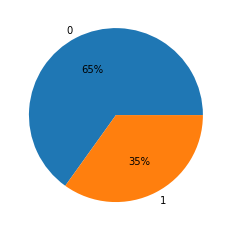

In [11]:
import matplotlib.pyplot as plt

# divisão de classes
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%')

In [8]:
counts

array([500, 268])

In [14]:
# Curva precision-recall
y_prob_test = modelo.predict_proba(X_test)[:, 1]

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)
average_precision = average_precision_score(y_test, y_prob_test)

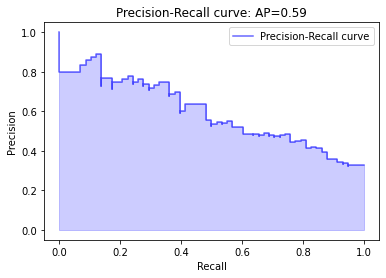

In [27]:
plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.6, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.legend(loc='best')
plt.show()


- Temos uma área sob a curva de precision-recall de 0.59, quanto mais próximo de 1, melhor é o modelo. 
- No nosso exemplo, temos uma performance moderada, que pode ser melhorada, entre outras coisas, com a variação dos hiperparâmetros. 

> Vamos agora treinar um segundo modelo mudando alguns valores de hiperparâmetros e plotar as curvas num mesmo gráfico para comparação:

In [34]:
# Treinar o segundo modelo com os novos hiperparâmetros
model2 = RandomForestClassifier(
    n_estimators=10,
    max_features=None,
    max_depth=5,
    min_samples_split=5,
    random_state=0
)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, min_samples_split=5,
                       n_estimators=10, random_state=0)

In [35]:
# Fazer predições no conjunto de teste para o segundo modelo
y_prob_test2 = model2.predict_proba(X_test)[:, 1]

In [36]:
# Calcular precision e recall para o segundo modelo
precision2, recall2, _ = precision_recall_curve(y_test, y_prob_test2)
average_precision2 = average_precision_score(y_test, y_prob_test2)

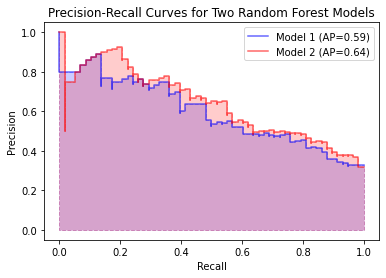

In [37]:
# Plotar as curvas Precision-Recall para ambos os modelos
plt.figure()

# Curva para o primeiro modelo
plt.step(recall, precision, where='post', 
         label=f'Model 1 (AP={average_precision:.2f})', color='b', alpha=0.6)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b', linestyle='dashed')

# Curva para o segundo modelo
plt.step(recall2, precision2, where='post', label=f'Model 2 (AP={average_precision2:.2f})', 
         color='r', alpha=0.6)
plt.fill_between(recall2, precision2, step='post', alpha=0.2, 
                 color='r', linestyle='dashed')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Two Random Forest Models')
plt.legend(loc='best')

- Aumentamos o número de estimadores no modelo 2 e o min_sample_split e mantivemos o mesmo valor de max_depth. Com essa mudança, já vimos uma melhora no desempenho do modelo, saindo de uma AP de 0.59 para 0.64. 
- Se tivéssemos que escolher entre os dois modelos usando a curva precision-recall, escolheríamos o modelo 2. 